# Advanced NumPy

In [1]:
%matplotlib inline

## Quick example: gene expression, without numpy

FIRST...

## Even quicker: what is gene expression?

How genes work:

![central dogma](images/centraldogma.png)

What this means:

![gene expression](images/gene-expression.png)

How we measure it:

![rna sequence](images/rnaseq.png)

## Some fake data

|        | Cell type A | Cell type B | Cell type C | Cell type D |
|--------|-------------|-------------|-------------|-------------|
| Gene 0 | 100         | 200         | 50          | 400         |
| Gene 1 | 50          | 0           | 0           | 100         |
| Gene 2 | 350         | 100         | 50          | 200         |

In [2]:
gene0 = [100, 200, 50, 400]
gene1 = [50, 0, 0, 100]
gene2 = [350, 100, 50, 200]
expression_data = [gene0, gene1, gene2]

Why is this a bad idea?

## Now with NumPy

In [3]:
import numpy as np
a = np.array(expression_data)
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


We are going to:

* Obtain an *RPKM* expression matrix
* Quantile normalize the data

using the awesome power of NumPy

## Inside a numpy ndarray

In [4]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:', a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [5]:
print(a.data)

In [6]:
abytes = a.ravel().view(dtype=np.uint8)

In [7]:
print_info(abytes)

number of elements: 96
number of dimensions: 1
shape: (96,)
data type: uint8
strides: (1,)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [8]:
print(abytes[:24])

[100   0   0   0   0   0   0   0 200   0   0   0   0   0   0   0  50   0
   0   0   0   0   0   0]


### Example: take the transpose of `a`

In [9]:
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [10]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Example: skipping rows and columns with *slicing*

In [11]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [12]:
print_info(a.T[::2])

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int64
strides: (16, 32)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [13]:
print_info(a.T[::2, ::2])

number of elements: 4
number of dimensions: 2
shape: (2, 2)
data type: int64
strides: (16, 64)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Getting a copy

In [14]:
b = a

In [15]:
print(b)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [16]:
a[0, 0] = 5
print(b)
a[0, 0] = 100

[[  5 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


## Advanced operations: axis-wise evaluation

In [17]:
expr = np.load('../../data/expr.npy')

In [18]:
print_info(expr)

number of elements: 7687500
number of dimensions: 2
shape: (20500, 375)
data type: uint32
strides: (4, 82000)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


This has the raw read count data. However, each sample gets a different number of reads, so we want to normalize by the *library size*, which is the total number of reads across a column.

The `np.sum` function returns the sum of all the elements of an array. With the `axis` argument, you can take the sum *along the given axis*.

In [19]:
lib_size = np.sum(expr, axis=0)
print(lib_size)

[ 41539237  50824374  35747651  33532890  48162893  83478927  61652756
  56043182  50066035  44291909  62103960  52177691  39935196  44712296
  49499950  54994779  64874312  41901128  61124396  74947233  55805778
  44751480  57419892  45460279  58590618  75900141  79022684  51253368
  63148322  64114541  53696942  50946576  55709927  60184139  73887491
  51905092  39721522  42746126  43019952  40435776  57789966  30526018
  50488171  59600438  49802751 103219262  80445758  76730579  59996715
  70611975  53788477  57967905  50450027  61725636  52939093  48355220
  60814140  61419740  52865931  42718020  47981997  50989994  55265609
  57268101  37174525  65469319  69459796  64633280  52550614  52800398
  67603908  42568697  54328614  58801154  41408022  55721943  56051351
  48906539  30074621  56514800  61685565  45155573  55190918  58239673
  51484868  56456500  58897501  41200475  60510647  45186472  48863100
  44723293  66857959  43679229  63454731  40459554  44210528  71649897
  5105

### Exercise

Generate a 10 x 3 array of random numbers. From each row, pick the number closest to 0.75. Make use of np.abs and np.argmax to find the column j which contains the closest element in each row.

## Advanced operations: broadcasting

In order to normalize every column by its corresponding library size, we have to *align* the two arrays' axes: each dimension must be either the same size, or one of the arrays must have size 1. Use `np.newaxis` to match the dimensions.

In [20]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis, :].shape)

(20500, 375)
(375,)
(1, 375)


However, NumPy will automatically prepend singleton dimensions until the array shapes match or there is an error:

In [21]:
np.all(expr / lib_size ==
       expr / lib_size[np.newaxis, :])

True

In [22]:
expr_lib = expr / lib_size

We also multiply by $10^6$ in order to keep the numbers on a readable scale (reads per million reads).

In [23]:
expr_lib *= 1e6

Finally, longer genes are more likely to produce reads. So we normalize by the gene length (in kb) to produce a measure of expression called Reads Per Kilobase per Million reads (RPKM).

In [24]:
gene_len = np.load('../../data/gene-lens.npy')
print(gene_len.shape)

(20500,)


### Exercise: broadcast `expr_lib` and `gene_len` together to produce RPKM

In [25]:
rpkm = expr_lib  # FIX THIS

In [26]:
import matplotlib.pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    fig, ax = plt.subplots()
    for density in density_per_col:
        ax.plot(x, density(x), *args, **kwargs)
    ax.set_xlabel('log-counts')
    ax.set_ylabel('frequency')
    if xlim is not None:
        ax.set_xlim(xlim)
    plt.show()


In [27]:
%matplotlib inline

In [28]:
plt.style.use('ggplot')

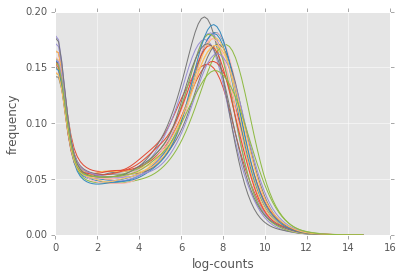

In [29]:
plot_col_density(np.log(expr+1)[:, :20])

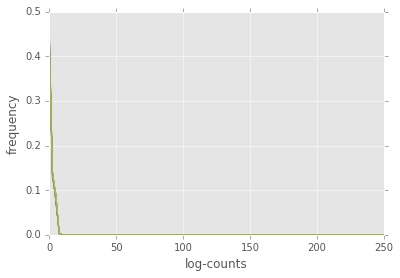

In [30]:
plot_col_density(np.log(rpkm + 1)[:, :20], xlim=(0, 250))

### Exercise: 3D broadcasting

Below, produce the array containing the sum of every element in `x` with every element in `y`

In [31]:
x = np.random.rand(3, 5)
y = np.random.randint(10, size=8)
z = x # FIX THIS

## Fancy indexing

You can index arrays with slicing, but also with boolean arrays (including broadcasting!), integer arrays, and individual indices along multiple dimensions.

In [32]:
values = np.array([0, 5, 99])
selector = np.random.randint(0, 3, size=(3, 4))
print(selector)
print(values[selector])

[[1 1 1 1]
 [2 2 1 1]
 [1 1 0 1]]
[[ 5  5  5  5]
 [99 99  5  5]
 [ 5  5  0  5]]


### Exercise: quantile normalization

Quantile Normalization(https://en.wikipedia.org/wiki/Quantile_normalization) is a method to align distributions. Implement it using NumPy axis-wise operations and fancy indexing.

*Hint: look for documentation for `scipy.mstats.rankdata`, `np.sort`, and `np.argsort`.*

In [33]:
def qnorm(x):
    """Quantile normalize an input matrix.
    
    Parameters
    ----------
    x : 2D array of float, shape (M, N)
        The input data, with each column being a
        distribution to normalize.
        
    Returns
    -------
    xn : 2D array of float, shape (M, N)
        The normalized data.
    """
    xn = np.copy(x) # replace this by normalizing code
    return xn

In [34]:
logexpr = np.log(expr + 1)
logrpkm = np.log(rpkm + 1)

In [35]:
logexprn = qnorm(logexpr)
logrpkmn = qnorm(logrpkm)

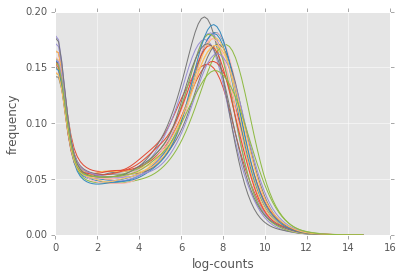

In [36]:
plot_col_density(logexprn[:, :20])

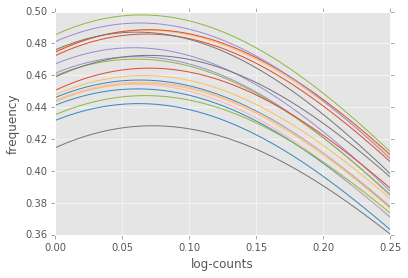

In [37]:
plot_col_density(logrpkmn[:, :20], xlim=(0, 0.25))